## Simple Regression Example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [7]:
noise

array([-2.21342759, -1.58839519,  2.46192763, ...,  0.36534892,
        0.2274045 , -1.16319871])

y = mx + b

b = 5

In [8]:
##looking to fixe the .5 value, adding noise to make it not a perfect fitted line
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [12]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
y_df.head()

,Y
0,2.786572
1,3.411610
2,7.461938
3,3.424461
4,7.131910


In [14]:
my_data = pd.concat([x_df,y_df],axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,2.786572
1,0.00001,3.411610
2,0.00002,7.461938
3,0.00003,3.424461
4,0.00004,7.131910


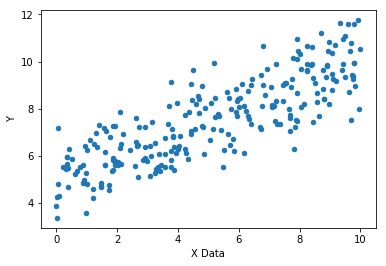

In [17]:
#to get 205 samples
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y")

In [19]:
#cant feed in 1 milion at once, so we make batchs
batch_size = 8
np.random.randn(2)

array([-1.04271678,  1.12167999])

In [20]:
m = tf.Variable(-1.0)
b = tf.Variable(1.1)

In [21]:
xph = tf.placeholder(tf.float32,[batch_size])

In [22]:
yph = tf.placeholder(tf.float32,[batch_size])

In [23]:
#this here is the computation graph 
y_model = m*xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    #so we are doing 8000 samples
    batches = 10000
    
    for i in range(batches):
        #gets the random 8
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [34]:
model_m

0.48336989

In [35]:
model_b

5.0061603

In [31]:
y_hat = x_data*model_m + model_b

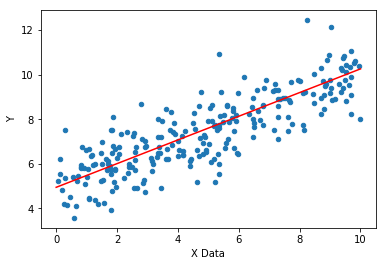

In [32]:
my_data.sample(250).plot(kind="scatter",x="X Data", y="Y")
plt.plot(x_data,y_hat,'r')

## TF Estimator

In [36]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [37]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols,)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmpt3zw4vze', '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None}


INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmpt3zw4vze', '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None}


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=.3, random_state=101)

In [40]:
print(x_train.shape)

(700000,)


In [42]:
x_eval.shape

(300000,)

In [44]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size=8,num_epochs=None,shuffle=True)

In [45]:
train_input_func = input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                               batch_size=8,num_epochs=1000,shuffle=False)

In [46]:
eval_input_func = input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval,
                                               batch_size=8,num_epochs=1000,shuffle=False)

In [48]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-100


INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-100


INFO:tensorflow:Saving checkpoints for 101 into C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt.


INFO:tensorflow:Saving checkpoints for 101 into C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt.


INFO:tensorflow:loss = 22.5888, step = 101


INFO:tensorflow:loss = 22.5888, step = 101


INFO:tensorflow:global_step/sec: 664.811


INFO:tensorflow:global_step/sec: 664.811


INFO:tensorflow:loss = 12.2231, step = 201 (0.156 sec)


INFO:tensorflow:loss = 12.2231, step = 201 (0.156 sec)


INFO:tensorflow:global_step/sec: 643.028


INFO:tensorflow:global_step/sec: 643.028


INFO:tensorflow:loss = 19.7187, step = 301 (0.159 sec)


INFO:tensorflow:loss = 19.7187, step = 301 (0.159 sec)


INFO:tensorflow:global_step/sec: 522.168


INFO:tensorflow:global_step/sec: 522.168


INFO:tensorflow:loss = 9.04, step = 401 (0.185 sec)


INFO:tensorflow:loss = 9.04, step = 401 (0.185 sec)


INFO:tensorflow:global_step/sec: 675.781


INFO:tensorflow:global_step/sec: 675.781


INFO:tensorflow:loss = 24.0204, step = 501 (0.148 sec)


INFO:tensorflow:loss = 24.0204, step = 501 (0.148 sec)


INFO:tensorflow:global_step/sec: 660.453


INFO:tensorflow:global_step/sec: 660.453


INFO:tensorflow:loss = 11.2124, step = 601 (0.152 sec)


INFO:tensorflow:loss = 11.2124, step = 601 (0.152 sec)


INFO:tensorflow:global_step/sec: 667.133


INFO:tensorflow:global_step/sec: 667.133


INFO:tensorflow:loss = 12.1952, step = 701 (0.149 sec)


INFO:tensorflow:loss = 12.1952, step = 701 (0.149 sec)


INFO:tensorflow:global_step/sec: 664.661


INFO:tensorflow:global_step/sec: 664.661


INFO:tensorflow:loss = 15.782, step = 801 (0.150 sec)


INFO:tensorflow:loss = 15.782, step = 801 (0.150 sec)


INFO:tensorflow:global_step/sec: 758.228


INFO:tensorflow:global_step/sec: 758.228


INFO:tensorflow:loss = 10.4047, step = 901 (0.134 sec)


INFO:tensorflow:loss = 10.4047, step = 901 (0.134 sec)


INFO:tensorflow:global_step/sec: 695.441


INFO:tensorflow:global_step/sec: 695.441


INFO:tensorflow:loss = 8.42078, step = 1001 (0.148 sec)


INFO:tensorflow:loss = 8.42078, step = 1001 (0.148 sec)


INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt.


INFO:tensorflow:Loss for final step: 17.3942.


INFO:tensorflow:Loss for final step: 17.3942.


In [ ]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

In [ ]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

In [51]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'loss': 8.3382406, 'average_loss': 1.0422801, 'global_step': 1100}


In [52]:
print('Eval Metrics')
print(eval_metrics)

Eval Metrics
{'loss': 8.3496895, 'average_loss': 1.0437112, 'global_step': 1100}


In [53]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [55]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-1100


INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-1100


[{'predictions': array([ 4.52950716], dtype=float32)},
 {'predictions': array([ 5.1722908], dtype=float32)},
 {'predictions': array([ 5.81507444], dtype=float32)},
 {'predictions': array([ 6.45785809], dtype=float32)},
 {'predictions': array([ 7.10064125], dtype=float32)},
 {'predictions': array([ 7.74342489], dtype=float32)},
 {'predictions': array([ 8.38620853], dtype=float32)},
 {'predictions': array([ 9.0289917], dtype=float32)},
 {'predictions': array([ 9.67177582], dtype=float32)},
 {'predictions': array([ 10.31455994], dtype=float32)}]

In [56]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-1100


INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmpt3zw4vze\model.ckpt-1100


In [57]:
predictions

[array([ 4.52950716], dtype=float32),
 array([ 5.1722908], dtype=float32),
 array([ 5.81507444], dtype=float32),
 array([ 6.45785809], dtype=float32),
 array([ 7.10064125], dtype=float32),
 array([ 7.74342489], dtype=float32),
 array([ 8.38620853], dtype=float32),
 array([ 9.0289917], dtype=float32),
 array([ 9.67177582], dtype=float32),
 array([ 10.31455994], dtype=float32)]

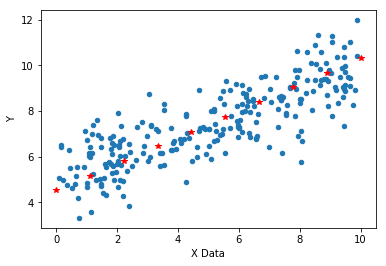

In [61]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')